In [1]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


<AxesSubplot:>

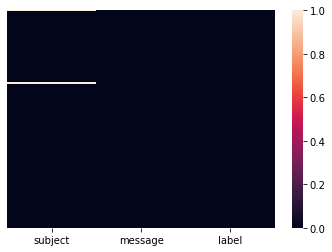

In [5]:
sns.heatmap(df.isnull(),  yticklabels=False)

In [6]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [7]:
df.fillna(df['subject'].mode().values[0],inplace=True)

subject    0
message    0
label      0
dtype: int64

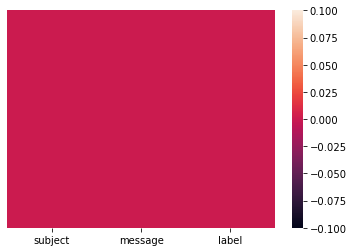

In [8]:
sns.heatmap(df.isnull(),  yticklabels=False)
df.isnull().sum()


In [9]:
df.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
df['sub_mssg']=df['subject']+df['message']
df.head()

,subject,message,label,sub_mssg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


In [11]:
df['sub_mssg'].describe()

count                                                  2893
unique                                                 2876
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: sub_mssg, dtype: object

In [12]:
df['length']=df['sub_mssg'].apply(len)
df.head()

,subject,message,label,sub_mssg,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [13]:
df.drop('subject',axis=1,inplace=True)
df.head()

,message,label,sub_mssg,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [14]:
import re

In [15]:
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')


df['sub_mssg']=df['sub_mssg'].str.lower()

df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ") 

df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')

df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money')

df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ')


df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '')

df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")


C:\Users\UBAIDU~1\AppData\Local\Temp/ipykernel_4808/3345753012.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')
C:\Users\UBAIDU~1\AppData\Local\Temp/ipykernel_4808/3345753012.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ")
C:\Users\UBAIDU~1\AppData\Local\Temp/ipykernel_4808/3345753012.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
C:\Users\UBAIDU~1\AppData\Local\Temp/ipykernel_4808/3345753012.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
C:\Users\UBAIDU~1\AppData\Local\Tem

In [16]:
df['Cleaned_Text'] = df['sub_mssg']

In [17]:
df.drop('sub_mssg',axis=1,inplace=True)
df.drop('message',axis=1,inplace=True)

df.head()

,label,length,Cleaned_Text
0,0,2895,job posting apple iss research centercontent l...
1,0,1816,sociolinguisticslang classification grimes jos...
2,0,1485,query letter frequencies for text identificati...
3,0,328,riska colleague and i are researching the diff...
4,0,1070,request book informationearlier this morning i...


0    2412
1     481
Name: label, dtype: int64

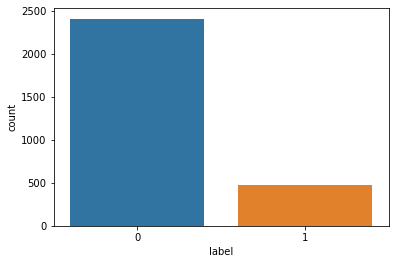

In [18]:
sns.countplot(x = "label", data = df)
df["label"].value_counts()


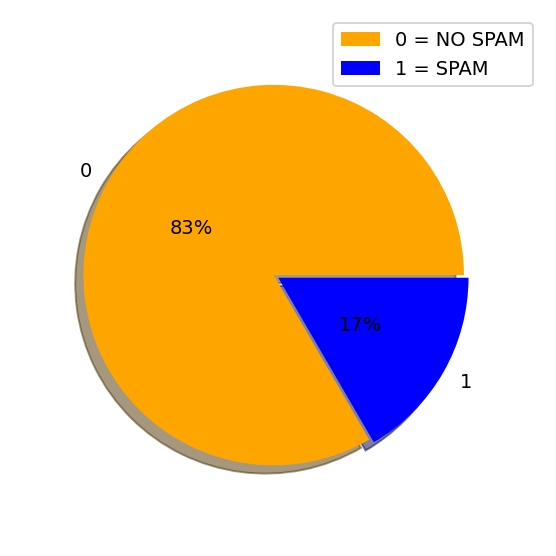

In [19]:
lb=df['label'].value_counts().index.tolist()
val=df['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [20]:
df.describe()

,label,length
count,2893.000000,2893.000000
mean,0.166263,3262.149326
std,0.372381,3655.249792
min,0.000000,36.000000
25%,0.000000,989.000000
50%,0.000000,2056.000000
75%,0.000000,4061.000000
max,1.000000,28672.000000


In [21]:
hamdf=df[df['label']==0]
spamdf=df[df['label']==1]


In [22]:
spamdf=spamdf.sample(hamdf.shape[0],replace=True)

final_dataframe=pd.concat([hamdf,spamdf],axis=0)



0    2412
1    2412
Name: label, dtype: int64

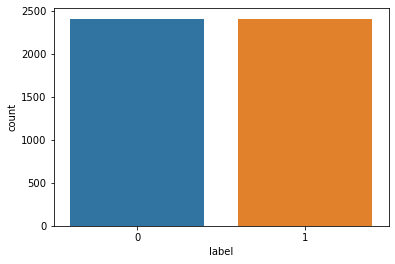

In [23]:
sns.countplot(x = "label", data = final_dataframe)
final_dataframe["label"].value_counts()
final_dataframe["label"].value_counts()

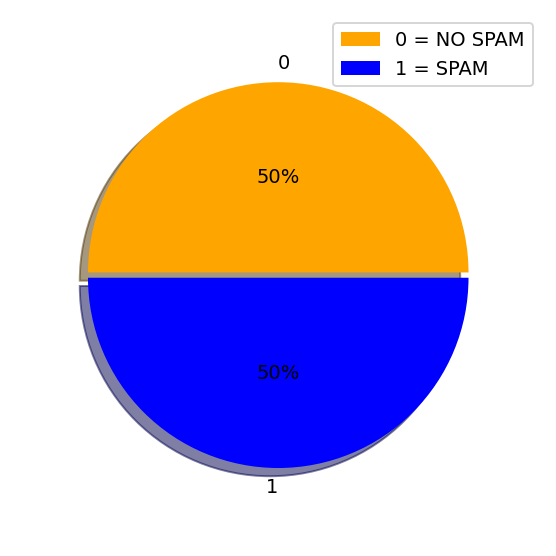

In [24]:
lb=final_dataframe['label'].value_counts().index.tolist()
val=final_dataframe['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(final_dataframe["Cleaned_Text"],final_dataframe["label"],test_size=0.2,random_state=20,shuffle=True,stratify=final_dataframe["label"])
Y_train.value_counts()
Y_test.value_counts()

1    483
0    482
Name: label, dtype: int64

In [26]:
import catboost
from catboost import CatBoostClassifier
import time
start=time.time()

model=Pipeline([('tfidf',TfidfVectorizer()),("Alg",CatBoostClassifier())])

model.fit(X_train,Y_train)
end=time.time()
print(f"Training Time=={end-start}")

Learning rate set to 0.018338
0:	learn: 0.6640981	total: 1.77s	remaining: 29m 24s
1:	learn: 0.6367177	total: 2.8s	remaining: 23m 19s
2:	learn: 0.6150848	total: 3.73s	remaining: 20m 38s
3:	learn: 0.5872569	total: 4.6s	remaining: 19m 5s
4:	learn: 0.5583212	total: 5.57s	remaining: 18m 29s
5:	learn: 0.5374743	total: 6.5s	remaining: 17m 56s
6:	learn: 0.5178104	total: 7.32s	remaining: 17m 17s
7:	learn: 0.5017599	total: 8.17s	remaining: 16m 53s
8:	learn: 0.4788923	total: 9.05s	remaining: 16m 36s
9:	learn: 0.4601269	total: 9.95s	remaining: 16m 25s
10:	learn: 0.4426894	total: 10.8s	remaining: 16m 11s
11:	learn: 0.4267214	total: 11.7s	remaining: 16m
12:	learn: 0.4082173	total: 12.5s	remaining: 15m 52s
13:	learn: 0.3947072	total: 13.5s	remaining: 15m 52s
14:	learn: 0.3780732	total: 14.5s	remaining: 15m 52s
15:	learn: 0.3654876	total: 15.2s	remaining: 15m 37s
16:	learn: 0.3555568	total: 15.9s	remaining: 15m 22s
17:	learn: 0.3407558	total: 16.7s	remaining: 15m 11s
18:	learn: 0.3282023	total: 17.5s	

154:	learn: 0.0587935	total: 1m 54s	remaining: 10m 26s
155:	learn: 0.0586938	total: 1m 55s	remaining: 10m 25s
156:	learn: 0.0585983	total: 1m 56s	remaining: 10m 24s
157:	learn: 0.0581091	total: 1m 56s	remaining: 10m 23s
158:	learn: 0.0579155	total: 1m 57s	remaining: 10m 22s
159:	learn: 0.0577331	total: 1m 58s	remaining: 10m 21s
160:	learn: 0.0576995	total: 1m 59s	remaining: 10m 20s
161:	learn: 0.0572379	total: 1m 59s	remaining: 10m 19s
162:	learn: 0.0568704	total: 2m	remaining: 10m 18s
163:	learn: 0.0568414	total: 2m 1s	remaining: 10m 17s
164:	learn: 0.0563919	total: 2m 1s	remaining: 10m 16s
165:	learn: 0.0559137	total: 2m 2s	remaining: 10m 15s
166:	learn: 0.0558490	total: 2m 3s	remaining: 10m 14s
167:	learn: 0.0557285	total: 2m 3s	remaining: 10m 13s
168:	learn: 0.0554053	total: 2m 4s	remaining: 10m 12s
169:	learn: 0.0549698	total: 2m 5s	remaining: 10m 12s
170:	learn: 0.0544538	total: 2m 6s	remaining: 10m 12s
171:	learn: 0.0543907	total: 2m 7s	remaining: 10m 11s
172:	learn: 0.0539493	t

307:	learn: 0.0353480	total: 3m 37s	remaining: 8m 8s
308:	learn: 0.0353155	total: 3m 37s	remaining: 8m 7s
309:	learn: 0.0352203	total: 3m 38s	remaining: 8m 6s
310:	learn: 0.0351381	total: 3m 39s	remaining: 8m 5s
311:	learn: 0.0348997	total: 3m 39s	remaining: 8m 5s
312:	learn: 0.0348884	total: 3m 40s	remaining: 8m 4s
313:	learn: 0.0348673	total: 3m 41s	remaining: 8m 3s
314:	learn: 0.0346718	total: 3m 41s	remaining: 8m 2s
315:	learn: 0.0346393	total: 3m 42s	remaining: 8m 1s
316:	learn: 0.0343983	total: 3m 43s	remaining: 8m
317:	learn: 0.0341694	total: 3m 43s	remaining: 8m
318:	learn: 0.0341530	total: 3m 44s	remaining: 7m 59s
319:	learn: 0.0339662	total: 3m 45s	remaining: 7m 58s
320:	learn: 0.0339516	total: 3m 45s	remaining: 7m 57s
321:	learn: 0.0337576	total: 3m 46s	remaining: 7m 56s
322:	learn: 0.0334746	total: 3m 47s	remaining: 7m 56s
323:	learn: 0.0333871	total: 3m 47s	remaining: 7m 55s
324:	learn: 0.0333745	total: 3m 48s	remaining: 7m 54s
325:	learn: 0.0333566	total: 3m 49s	remaining

461:	learn: 0.0234161	total: 5m 18s	remaining: 6m 11s
462:	learn: 0.0233951	total: 5m 19s	remaining: 6m 10s
463:	learn: 0.0232712	total: 5m 20s	remaining: 6m 10s
464:	learn: 0.0232057	total: 5m 20s	remaining: 6m 9s
465:	learn: 0.0231832	total: 5m 21s	remaining: 6m 8s
466:	learn: 0.0231734	total: 5m 22s	remaining: 6m 7s
467:	learn: 0.0231640	total: 5m 22s	remaining: 6m 7s
468:	learn: 0.0231377	total: 5m 23s	remaining: 6m 6s
469:	learn: 0.0229885	total: 5m 24s	remaining: 6m 5s
470:	learn: 0.0229804	total: 5m 24s	remaining: 6m 4s
471:	learn: 0.0228927	total: 5m 25s	remaining: 6m 4s
472:	learn: 0.0228868	total: 5m 26s	remaining: 6m 3s
473:	learn: 0.0228776	total: 5m 26s	remaining: 6m 2s
474:	learn: 0.0228675	total: 5m 27s	remaining: 6m 1s
475:	learn: 0.0227146	total: 5m 28s	remaining: 6m 1s
476:	learn: 0.0227044	total: 5m 28s	remaining: 6m
477:	learn: 0.0226880	total: 5m 29s	remaining: 5m 59s
478:	learn: 0.0225556	total: 5m 30s	remaining: 5m 59s
479:	learn: 0.0224292	total: 5m 30s	remainin

614:	learn: 0.0152673	total: 6m 59s	remaining: 4m 22s
615:	learn: 0.0152641	total: 7m	remaining: 4m 22s
616:	learn: 0.0152503	total: 7m 1s	remaining: 4m 21s
617:	learn: 0.0152123	total: 7m 1s	remaining: 4m 20s
618:	learn: 0.0151945	total: 7m 2s	remaining: 4m 20s
619:	learn: 0.0150865	total: 7m 3s	remaining: 4m 19s
620:	learn: 0.0150834	total: 7m 3s	remaining: 4m 18s
621:	learn: 0.0150776	total: 7m 4s	remaining: 4m 17s
622:	learn: 0.0150644	total: 7m 5s	remaining: 4m 17s
623:	learn: 0.0150582	total: 7m 5s	remaining: 4m 16s
624:	learn: 0.0149647	total: 7m 6s	remaining: 4m 15s
625:	learn: 0.0149617	total: 7m 7s	remaining: 4m 15s
626:	learn: 0.0148332	total: 7m 7s	remaining: 4m 14s
627:	learn: 0.0147456	total: 7m 8s	remaining: 4m 13s
628:	learn: 0.0147426	total: 7m 9s	remaining: 4m 13s
629:	learn: 0.0147365	total: 7m 9s	remaining: 4m 12s
630:	learn: 0.0146497	total: 7m 10s	remaining: 4m 11s
631:	learn: 0.0146467	total: 7m 11s	remaining: 4m 11s
632:	learn: 0.0146421	total: 7m 11s	remaining:

768:	learn: 0.0108281	total: 8m 41s	remaining: 2m 36s
769:	learn: 0.0107580	total: 8m 42s	remaining: 2m 35s
770:	learn: 0.0107360	total: 8m 42s	remaining: 2m 35s
771:	learn: 0.0107325	total: 8m 43s	remaining: 2m 34s
772:	learn: 0.0107220	total: 8m 44s	remaining: 2m 33s
773:	learn: 0.0107135	total: 8m 44s	remaining: 2m 33s
774:	learn: 0.0107102	total: 8m 45s	remaining: 2m 32s
775:	learn: 0.0107067	total: 8m 46s	remaining: 2m 31s
776:	learn: 0.0106489	total: 8m 46s	remaining: 2m 31s
777:	learn: 0.0106032	total: 8m 47s	remaining: 2m 30s
778:	learn: 0.0105370	total: 8m 48s	remaining: 2m 29s
779:	learn: 0.0104703	total: 8m 48s	remaining: 2m 29s
780:	learn: 0.0104604	total: 8m 49s	remaining: 2m 28s
781:	learn: 0.0104587	total: 8m 49s	remaining: 2m 27s
782:	learn: 0.0104554	total: 8m 50s	remaining: 2m 27s
783:	learn: 0.0104522	total: 8m 51s	remaining: 2m 26s
784:	learn: 0.0104469	total: 8m 51s	remaining: 2m 25s
785:	learn: 0.0104179	total: 8m 52s	remaining: 2m 25s
786:	learn: 0.0104162	total:

921:	learn: 0.0082437	total: 10m 22s	remaining: 52.7s
922:	learn: 0.0081836	total: 10m 23s	remaining: 52s
923:	learn: 0.0081560	total: 10m 23s	remaining: 51.3s
924:	learn: 0.0081486	total: 10m 24s	remaining: 50.6s
925:	learn: 0.0081464	total: 10m 25s	remaining: 50s
926:	learn: 0.0081454	total: 10m 25s	remaining: 49.3s
927:	learn: 0.0081443	total: 10m 26s	remaining: 48.6s
928:	learn: 0.0081383	total: 10m 27s	remaining: 47.9s
929:	learn: 0.0081178	total: 10m 27s	remaining: 47.2s
930:	learn: 0.0081096	total: 10m 28s	remaining: 46.6s
931:	learn: 0.0080600	total: 10m 29s	remaining: 45.9s
932:	learn: 0.0080340	total: 10m 29s	remaining: 45.2s
933:	learn: 0.0080285	total: 10m 30s	remaining: 44.5s
934:	learn: 0.0079981	total: 10m 31s	remaining: 43.9s
935:	learn: 0.0079690	total: 10m 31s	remaining: 43.2s
936:	learn: 0.0079638	total: 10m 32s	remaining: 42.5s
937:	learn: 0.0079638	total: 10m 32s	remaining: 41.8s
938:	learn: 0.0079638	total: 10m 33s	remaining: 41.2s
939:	learn: 0.0079566	total: 10m

In [27]:
Y_pred=model.predict(X_test)


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)



array([[476,   6],
       [  0, 483]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       482
           1       0.99      1.00      0.99       483

    accuracy                           0.99       965
   macro avg       0.99      0.99      0.99       965
weighted avg       0.99      0.99      0.99       965



In [30]:
cnf=confusion_matrix(Y_test,Y_pred)

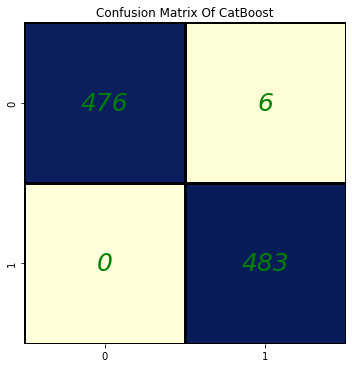

In [31]:
plt.figure(figsize = (5, 5))
annot_kws={'fontsize':25,'fontstyle':'italic','color':"g",'va':'center',"ha":'center','alpha':1,
}
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,Y_pred)),annot=True, cmap="YlGnBu" ,fmt="d",annot_kws=annot_kws,square=True,cbar=False,linecolor="black",linewidth=3)
plt.tight_layout()
plt.title("Confusion Matrix Of CatBoost")
plt.ylabel=("Actual Labels")
plt.xlabel= ("Predicted Labels")
plt.show()

In [32]:
df1 = Y_pred

In [33]:
df1 = pd.DataFrame(df1)

In [34]:
df1.rename(columns={0: "Predicted Emails"}, inplace=True)
df1

,Predicted Emails
0,1
1,1
2,1
3,0
4,1
...,...
960,1
961,1
962,0
963,0


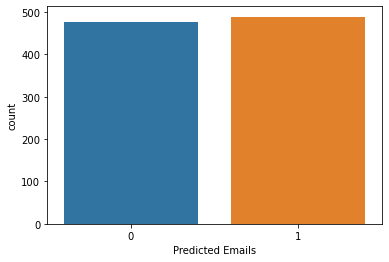

In [35]:
sns.countplot(x = "Predicted Emails", data = df1)
plt.show()


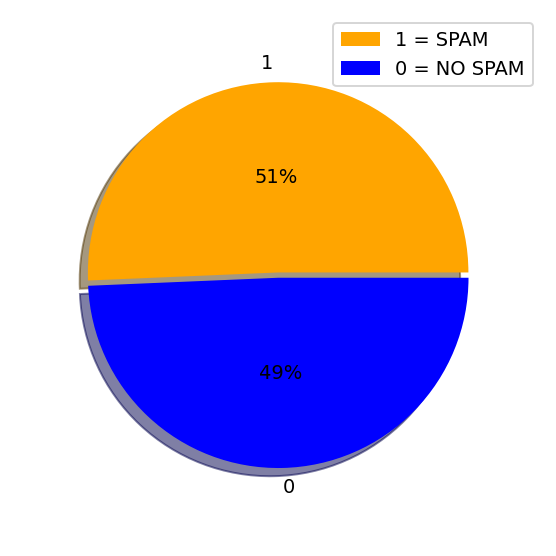

In [36]:
lb=df1["Predicted Emails"].value_counts().index.tolist()
val=df1["Predicted Emails"].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(['1 = SPAM',"0 = NO SPAM"])
plt.show()

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print(accuracy_score(Y_test,Y_pred))

0.9937823834196892


In [39]:
joblib.dump(model,"xgboost.pkl")

['xgboost.pkl']